In [1]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import math

In [2]:
#Tile setings
name_image = "data\mini2.png"
first_image = Image.open(name_image)
scale = 10
step_im = 3
lpr = 0
tpb = 1

#New image setings
name = "NewImage{}.png"
size = [50, 200] # y, x
startpix = [math.floor(step_im / 2), size[0] - math.ceil(step_im / 2)] # y, x
old_map_start = [0, first_image.size[1] - step_im]

In [3]:
class AvalibleTile:
    def __init__(self, tile):
        self.at = list(range(tile))
    
    def deleteAT(self, tile):
        self.at.remove(tile)
    
    def clearAT(self, tile):
        self.at = [tile]

(5, 5)


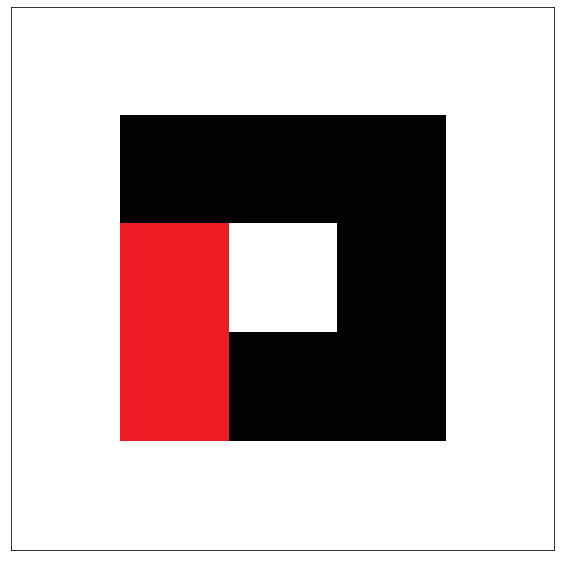

In [4]:
plt.figure(figsize=(scale, scale))
for i in range(1):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(first_image)
print(first_image.size)

In [5]:
mass_crop_periods = numpy.array([0] ,int)
mass_crop = numpy.dtype(int)

for i in range(first_image.size[1] - (step_im - 1) * tpb):
    for i2 in range(first_image.size[0] - (step_im - 1) * lpr):
        crop_im = first_image.crop((i2, i, (i2 + step_im), (i + step_im)))
        im_array = numpy.array(crop_im, dtype=int)[:, :, 0:3]
        # first part
        if mass_crop is numpy.dtype(int):
            mass_crop = numpy.array([im_array])
        
        # left + right
        if i2 + step_im > first_image.size[0]:
            mask_lp = numpy.zeros((step_im, first_image.size[0] - i2, 3) ,int)
            crop_im = first_image.crop((0, i, i2 + step_im - first_image.size[0], (i + step_im)))
            mask_lp = numpy.append(mask_lp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 1)
            im_array += mask_lp
        # top + bottom
        if i + step_im > first_image.size[1]:
            mask_tp = numpy.zeros((first_image.size[1] - i, step_im , 3) ,int)
            crop_im = first_image.crop((i2, 0, (i2 + step_im), i + step_im - first_image.size[1]))
            mask_tp = numpy.append(mask_tp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 0)
            im_array += mask_tp
        # t+b & l+r
        # Дописать потом        
        
        # 0%
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip            
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # 90%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # 180%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # 270%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1

92


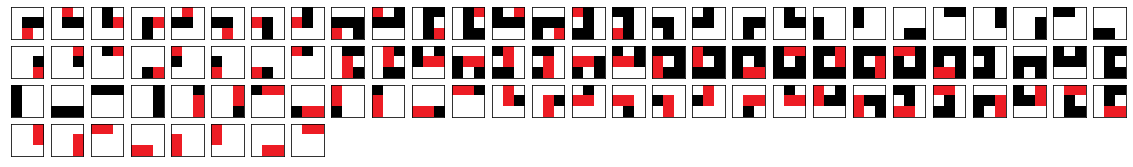

In [7]:
plt.figure(figsize=(2*scale, 2*scale))
for i in range(28*28):
    if i == len(mass_crop):
        break
    plt.subplot(28, 28, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mass_crop[i])

In [8]:
new_image_array = numpy.zeros((size[0], size[1], 3), int)
crop_im = first_image.crop((old_map_start[0], old_map_start[1], old_map_start[0] + step_im, old_map_start[1] + step_im))
im_array = numpy.array(crop_im, dtype=int)[:, :, 0:3];
index_tile = list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)

tale_map = [[AvalibleTile(len(mass_crop)) for i in range(size[0])] for i2 in range(size[1])]
tale_map = numpy.array(tale_map)
tale_map[startpix[0]][startpix[1]].clearAT(index_tile)


In [9]:
# Painting
for i in range(tale_map.shape[1]):
    for i2 in range(tale_map.shape[0]):
        new_image_array[i][i2] = mass_crop[tale_map[i2][i].at[0]][1][1]

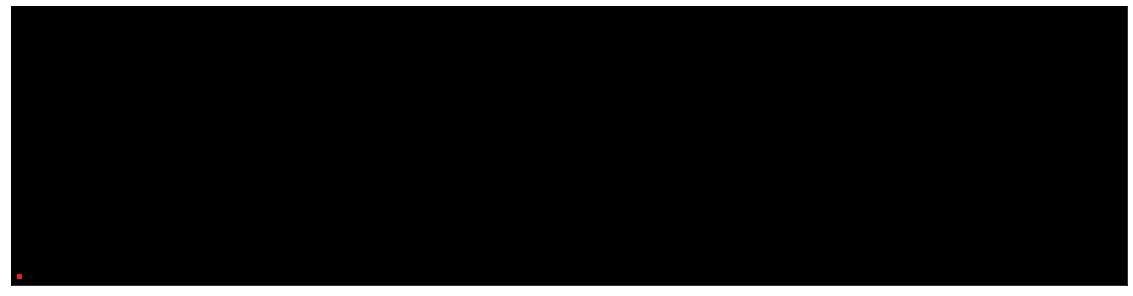

In [10]:
plt.figure(figsize=(2*scale, 2*scale))
plt.xticks([])
plt.yticks([])
plt.imshow(new_image_array)